In [1]:
#Importação da(s) biblioteca(s) necessária(s)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#Criação do dataframe a partir do arquivo disponibilizado em excel
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
#Exibição das informações básicas do dataframe (Nº de linhas e colunas, tipos de dados e existência de valores nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [8]:
#Alteração do tipo de dado das colunas de ID uma vez que não faz sentido fazer operações matemáticas com esses identificadores e verificação da alteração.
df["ID Loja"] = df["ID Loja"].astype("object")
df["ID Produto"] = df["ID Produto"].astype("object")
df["ID Cliente"] = df["ID Cliente"].astype("object")
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                   object
ID Produto                object
ID Cliente                object
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [15]:
#Verificação do período de venda a que se referem os dados disponíveis
data_min = df["Data Venda"].min()
data_max = df["Data Venda"].max()
print(f"Data inicial: {data_min} \nData final: {data_max}")



Data inicial: 2008-01-02 00:00:00 
Data final: 2009-12-31 00:00:00


In [19]:
#Inclusão das colunas de Custo Total e Lucro no dataframe para análise do Lucro e seus componentes.
df["Valor Custo"] = df["Custo Unitário"] * df["Quantidade"]
df["Lucro"] = df["Valor Venda"] - df["Valor Custo"]
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Valor Custo,Lucro
424,2008-11-09,2008-11-18,199,1155,18885,200811094CS790,324.69,980.0,9,1764.0,7056.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,2922.21,4133.79
485,2009-12-14,2009-12-27,199,1226,19029,200912144CS945,330.99,999.0,17,3396.6,13586.4,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,5626.83,7959.57
437,2009-11-15,2009-11-19,307,366,19140,200911153CS730,348.58,758.0,9,1023.3,5798.7,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,3137.22,2661.48


In [27]:
#Cálculo dos valores totais de lucro, receita e custo (da base completa)
lucro_total = df["Lucro"].sum()
receita_total = df["Valor Venda"].sum()
custo_total = df["Valor Custo"].sum()
print(f"No período de jan/2008 a dez/2009, O lucro total da empresa foi de R$ {lucro_total:,.2f}, as receitas foram R$ {receita_total:,.2f}) e os custos R$ {custo_total:,.2f}.")

No período de jan/2008 a dez/2009, O lucro total da empresa foi de R$ 3,497,823.09, as receitas foram R$ 5,984,606.14) e os custos R$ 2,486,783.05.


In [22]:
#Inclusão da coluna de Ano da Venda para facilitar as análises por ano
df["Ano da Venda"] = df["Data Venda"].dt.year

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Valor Custo,Lucro,Ano da Venda
481,2009-06-27,2009-07-08,307,1155,19127,200906274CS717,324.69,980.0,13,1274.0,11466.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,4220.97,7245.03,2009


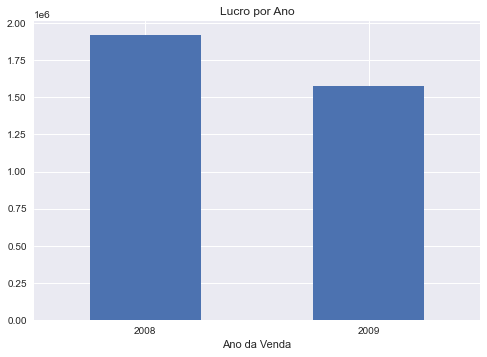

In [69]:
# Análise do lucro por ano
df.groupby("Ano da Venda")["Lucro"].sum().plot.bar(title="Lucro por Ano")
plt.xticks(rotation = "horizontal");

In [56]:
# Análise do lucro por marca
lucro_marca = df.groupby([df["Ano da Venda"],"Marca"])["Lucro"].sum().reset_index()
pd.options.display.float_format = "{:,.2f}".format
lucro_marca

,Ano da Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [53]:
# Análise do lucro por marca (cont): O lucro cresceu de 2008 para 2009 nas marcas Adventure Works e Contoso e caiu na marca Fabrikam.

In [64]:
#Início da Análise das Vendas do ano de 2009 
#Cria df auxiliar apenas com os dados de 2009
df_2009 = df[df["Ano da Venda"] == 2009]
df_2009.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Valor Custo,Lucro,Ano da Venda,Tempo de Envio
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",2009,11
331,2009-12-29,2010-01-07,307,384,19145,200912293CS735,348.58,758.00,7,795.90,"4,510.10",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,440.06","2,070.04",2009,9
115,2009-05-07,2009-05-18,306,1155,19067,200905074CS746,324.69,980.00,6,0.00,"5,880.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,931.86",2009,11
245,2009-07-23,2009-07-27,307,1203,19130,200907234CS720,324.69,980.00,7,0.00,"6,860.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"2,272.83","4,587.17",2009,4
348,2009-07-30,2009-08-06,199,1202,18973,200907304CS885,330.66,998.00,13,"1,297.40","11,676.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"4,298.58","7,378.02",2009,7


<AxesSubplot:title={'center':'Lucro por mês'}, xlabel='Data Venda'>

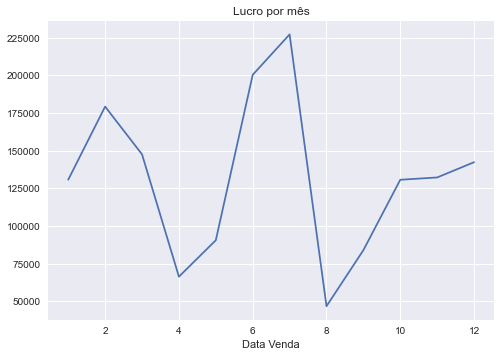

In [70]:
# Retorna os valores mensais de lucro de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro por mês")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

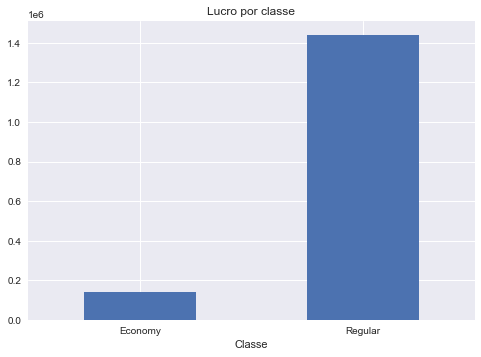

In [75]:
# Retorna os valores de lucro de 2009 por classe
df_2009.groupby(df_2009["Classe"])["Lucro"].sum().plot.bar(title="Lucro por classe")
plt.xticks(rotation = "horizontal")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

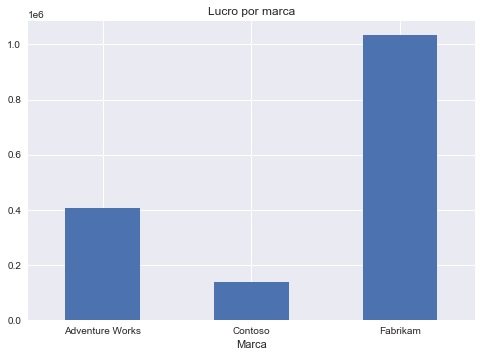

In [74]:
# Retorna os valores de lucro de 2009 por marca
df_2009.groupby(df_2009["Marca"])["Lucro"].sum().plot.bar(title="Lucro por marca")
plt.xticks(rotation = "horizontal")

<AxesSubplot:title={'center':'Lucro por produto'}, ylabel='Produto'>

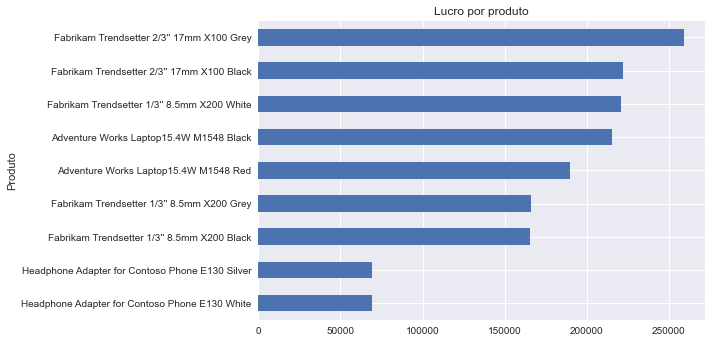

In [77]:
# Retorna os valores de lucro de 2009 por produto
df_2009.groupby("Produto")["Lucro"].sum().sort_values(ascending = True).plot.barh(title= "Lucro por produto")

<AxesSubplot:title={'center':'Total de Produtos Vendidos'}, ylabel='Produto'>

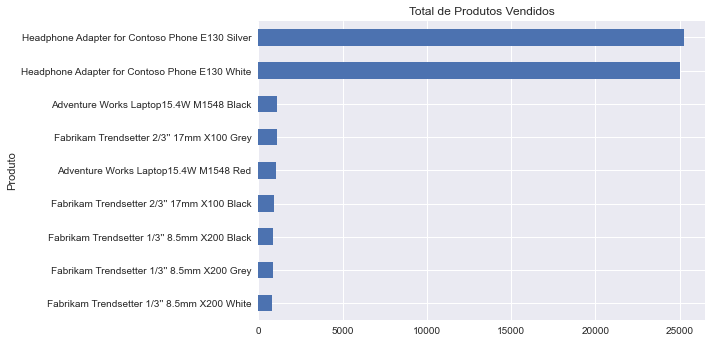

In [60]:
# Análise das quantidades vendidas por produto 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title= "Total de Produtos Vendidos")

In [38]:
#Início da análise do tempo de envio
#Inclusão da coluna de Tempo de Envio e cálculo do Tempo médio de envio (geral)
df["Tempo de Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df["Tempo de Envio"].mean()


8.543141592920353

In [79]:
#Descrição estatística básica dos dados de tempo de envio
df["Tempo de Envio"].describe()

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo de Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x17112362820>,
 'caps': [<matplotlib.lines.Line2D at 0x17112362ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171123623a0>],
 'medians': [<matplotlib.lines.Line2D at 0x171124255e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17112425940>],
 'means': []}

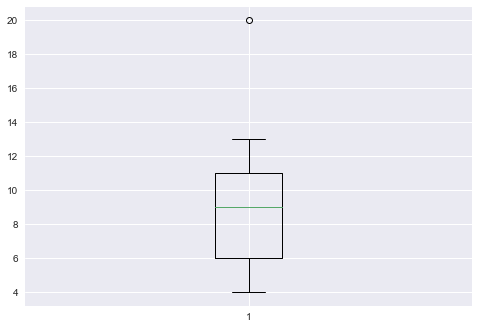

In [104]:
# Exibção dos pontos: mín, máximo, mediana, quartis e outliers dos dados de Tempo de Envio
plt.boxplot(df["Tempo de Envio"])

In [92]:
#Verificação se há variação no tempo médio de envio por marca por Ano
df.groupby("Marca")["Tempo de Envio"].mean()


Marca
Adventure Works   8.66
Contoso           8.47
Fabrikam          8.51
Name: Tempo de Envio, dtype: float64

In [99]:
#Verificação se há variação no tempo médio de envio por marca (usada a data da venda para não inflar os dados do envio de 2010 que teriam poucas observações)
df.groupby(df["Data Venda"].dt.year)["Tempo de Envio"].mean()


Data Venda
2008   8.33
2009   8.77
Name: Tempo de Envio, dtype: float64

In [103]:
tempo_envio_marca = df.groupby([df["Ano da Venda"],"Marca"])["Tempo de Envio"].mean().reset_index()
pd.options.display.float_format = "{:,.2f}".format
tempo_envio_marca


,Ano da Venda,Marca,Tempo de Envio
0,2008,Adventure Works,8.55
1,2008,Contoso,8.36
2,2008,Fabrikam,8.24
3,2009,Adventure Works,8.75
4,2009,Contoso,8.57
5,2009,Fabrikam,8.88


(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

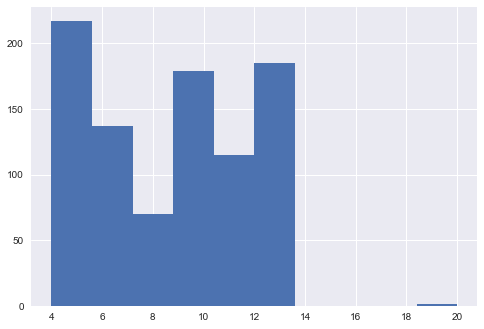

In [105]:
#Análise da distribuição dos dados de Tempo de envio
plt.hist(df["Tempo de Envio"])

In [106]:
#Identificação do outlier para checagem se trata-se de erro na alimentação dos dados ou de ocorrência com causas especiais de variação.
df[df["Tempo de Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Valor Custo,Lucro,Ano da Venda,Tempo de Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",2008,20


{'whiskers': [<matplotlib.lines.Line2D at 0x171124ef7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x171124efeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171124ef490>],
 'medians': [<matplotlib.lines.Line2D at 0x171124ff5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x171124ff910>],
 'means': []}

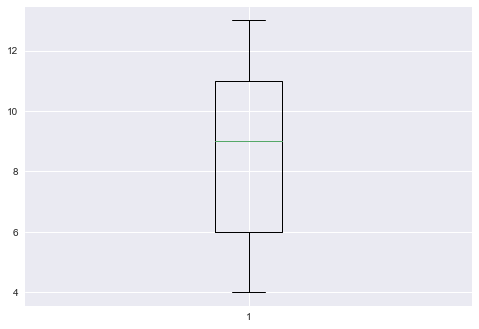

In [107]:
#Análise do boxplot de 2009 comparativamente ao do períido global
plt.boxplot(df_2009["Tempo de Envio"])

(array([57., 35., 30., 33., 19., 59., 47., 55., 56., 44.]),
 array([ 4. ,  4.9,  5.8,  6.7,  7.6,  8.5,  9.4, 10.3, 11.2, 12.1, 13. ]),
 <BarContainer object of 10 artists>)

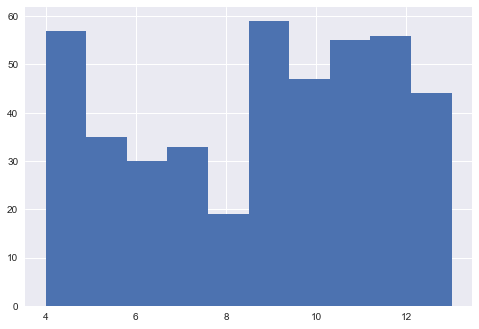

In [108]:
plt.hist(df_2009["Tempo de Envio"])